타이타닉의 생존자 분류 모델 구현

In [264]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [265]:
# 타이타닉의 생존자 분류 모델 구현하시오.
# target : survived
# data : 그외

# bodies 삭제

# 데이터 확인 :  NaN, 0, 타입(str) 등
  #  NaN : 평균(중간값), 0, 삭제, 최빈값
# 데이터 전처리 : NaN, 0, str 어떻게 처리?
# train, test 세트 

# 불필요한 피처를 제거 : 제거 피처는 체크 해 둘 것
# 'name', 'ticket', 'body', 'cabin', 'bome.dest' - name, cabin 사용 해 볼것

# 각각 모델을 적용

# 정답률 체크

# 분류 : 로지스틱회귀, 결정트리, 랜덤포레스트

요구사항 분석 
- 거래처, 담당자, 의뢰자 등으로부터 문의 필요

데이터 피처 설명
- pclass : Passenger Class, 승객 등급
- survived : 생존 여부 : target 값이 됨.
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 탑승 한 형제/배우자 수
- parch : 탑승 한 부모/자녀 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
- body : 사망자 확인 번호 - 분석과정에서 제외해야 함. 머신러닝에 100% 영향을 미침.
- home.dest : 고향/목적지

In [266]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [267]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [268]:
# sex ==> 원핫인코딩
# 결측치 확인
  # age : 어떻게 처리? 결측치 삭제!

In [269]:
df_train.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'body', 'home.dest'],
      dtype='object')

In [270]:
# name, ticket, body, cabin, home.dest 삭제
# df_train = df_train[['pclass','survived','sex','age','sibsp','parch','fare','embarked']]
df_train = df_train[['pclass','survived', 'sex', 'age','sibsp','parch','fare']]

In [271]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       741 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 50.2+ KB


In [272]:
df_train.iloc[:,2]

0      female
1      female
2      female
3        male
4      female
        ...  
911    female
912      male
913    female
914    female
915    female
Name: sex, Length: 916, dtype: object

In [273]:
# 원핫인코딩 : 성별
# 성별
# ohe_s = pd.get_dummies(df_train['sex'])

# ohe_s = df_train.iloc[:,2]
# for i in range(len(df_train)-1):
#     t = pd.get_dummies(df_train.iloc[:,2], drop_first=True, dtype=float)
#     ohe_s = pd.concat([ohe_s, t], axis=1)
# ohe_s

# df_train
# df_train
# pd.get_dummies(df_train['sex'])

# pd.get_dummies(df_train, drop_first=True)
# a1 = pd.get_dummies(df_train.iloc[:,2])
# a1

df_train = pd.get_dummies(df_train)
df_train.to_numpy()

array([[2, 1, 13.0, ..., 19.5, True, False],
       [2, 1, 4.0, ..., 23.0, True, False],
       [2, 1, 30.0, ..., 13.8583, True, False],
       ...,
       [3, 1, nan, ..., 7.7333, True, False],
       [2, 1, 20.0, ..., 36.75, True, False],
       [3, 0, 32.0, ..., 15.5, True, False]], dtype=object)

In [274]:
# age - 결측치 삭제
df_train.isnull().sum()
df_train.isnull().sum().sum()

175

In [275]:
# age - 결측치 삭제
# .dropna() : NaN 삭제 함수
df_train = df_train.dropna()

In [276]:
df_train.isnull().sum() # NaN 값 삭제 확인!

pclass        0
survived      0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [277]:
df_train

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male
0,2,1,13.00,0,1,19.5000,True,False
1,2,1,4.00,1,1,23.0000,True,False
2,2,1,30.00,1,0,13.8583,True,False
4,3,1,22.00,0,0,7.7250,True,False
6,1,1,30.00,0,0,56.9292,True,False
...,...,...,...,...,...,...,...,...
907,3,1,31.00,0,0,8.6833,True,False
908,2,0,24.00,0,0,13.0000,True,False
911,3,1,0.17,1,2,20.5750,True,False
914,2,1,20.00,0,0,36.7500,True,False


In [278]:
df_train.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'sex_male'],
      dtype='object')

In [280]:
# data = df_train.drop()
target = df_train['survived'] 
data = df_train[['pclass', 'sex_female','sex_male', 'age', 'sibsp', 'fare']]

<Axes: >

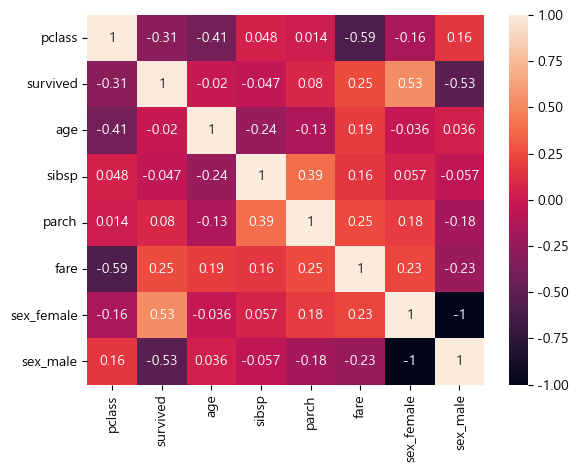

In [281]:
import seaborn as sns
sns.heatmap(df_train.corr(method='pearson'), annot=True)

In [ ]:
# 분류 : 로지스틱회귀, 결정트리, 랜덤포레스트

In [282]:
# 로지스틱회귀

# train, test 세트
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, random_state=42
)

In [283]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [284]:
# 데이터 학습시키기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [285]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_input, test_target))

0.7765765765765765
0.6021505376344086


c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [290]:
# 규제 강화

# 데이터 학습시키기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_input, test_target))

   # ==> 값 차이 거의 없음.

0.7747747747747747
0.6021505376344086


c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [291]:
# 결정 트리

In [296]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9855855855855856
0.7741935483870968


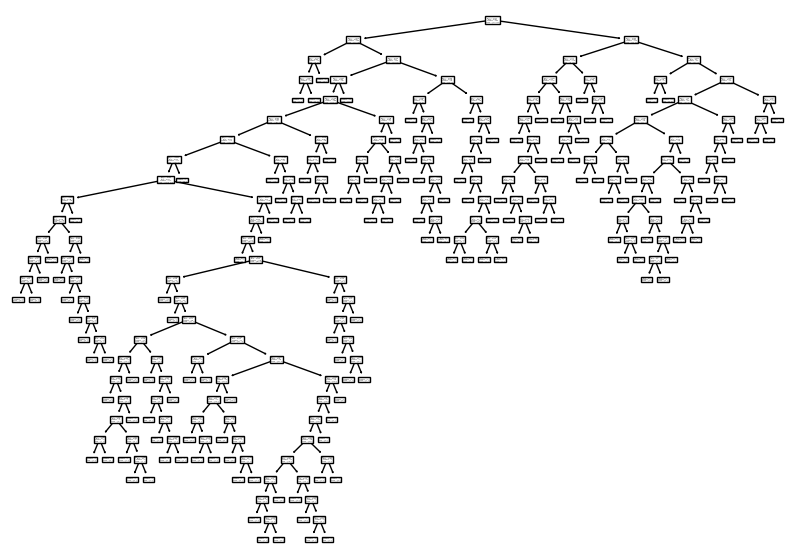

In [301]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [302]:
# 랜덤포레스트  

In [303]:
# 머신러닝 - cross_validate
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
# n_jobs : 모든 core 사용
rf = RandomForestClassifier(n_jobs=1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9873873873873874 0.7891891891891892


In [305]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.0761063  0.16042875 0.11013347 0.29566984 0.04928603 0.30837561]


In [306]:
0.0761063+0.16042875+0.11013347+0.29566984+0.04928603+0.30837561

1.0